##                                                                          **Careers at CODEBUGGED**

# Assignment : For Computer Vision Engineer Role

# Task :-
Mask R-CNN is an object detection model based on deep convolutional neural networks (CNN) developed by a group of Facebook AI researchers in 2017. The model can return both the bounding box
and a mask for each detected object in an image.


About Mask RCNN:

Mask RCNN is a deep neural network aimed to solve instance segmentation problem in machine learning or computer vision. In other words, it can separate different objects in a image or a video. You give it a image, it gives you the object bounding boxes, classes and masks. There are two stages of Mask RCNN.

# Upload your Data to your Google Drive.

# To mount your drive Run the following code in colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Uninstalling the default libraries

In [2]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0


# Installing the all dependencies libraries

In [3]:
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

     |████████████████████████████████| 92.6 MB 1.4 MB/s 
     |████████████████████████████████| 3.2 MB 40.5 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 367 kB 56.1 MB/s 
     |████████████████████████████████| 42 kB 944 kB/s 
     |████████████████████████████████| 4.1 MB 15.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.
     |█

# Next we clone  download the pretraind weights file.We are going to train the weights using our own dataset.


In [4]:
!git clone https://github.com/matterport/Mask_RCNN.git
%cd /content/Mask_RCNN
!python setup.py install
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 23.92 MiB/s, done.
Resolving deltas: 100% (565/565), done.
/content/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running i

**I've also cloned my prepared dataset to Google Colab**



In [5]:
!git clone https://github.com/experiencor/kangaroo

Cloning into 'kangaroo'...
remote: Enumerating objects: 334, done.
remote: Total 334 (delta 0), reused 0 (delta 0), pack-reused 334
Receiving objects: 100% (334/334), 18.39 MiB | 32.52 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [6]:
# Import all dependencies
import os
import xml.etree
from numpy import zeros, asarray

import mrcnn.utils
import mrcnn.config
import mrcnn.model
# From M-RCNN dir we are read utils.py data file
class KangarooDataset(mrcnn.utils.Dataset):

	def load_dataset(self, dataset_dir, is_train=True):
		self.add_class("dataset", 1, "kangaroo")

		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annots/'

		for filename in os.listdir(images_dir):
			image_id = filename[:-4]

			if image_id in ['00090']:
				continue

			if is_train and int(image_id) >= 150:
				continue

			if not is_train and int(image_id) < 150:
				continue

			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'

			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
# To draw bounding boxes
	def extract_boxes(self, filename):
		tree = xml.etree.ElementTree.parse(filename)

		root = tree.getroot()

		boxes = list()
		for box in root.findall('.//bndbox'):
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes.append(coors)

		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		return boxes, width, height
# Method to mask the image
	def load_mask(self, image_id):
		info = self.image_info[image_id]
		path = info['annotation']
		boxes, w, h = self.extract_boxes(path)
		masks = zeros([h, w, len(boxes)], dtype='uint8')

		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			masks[row_s:row_e, col_s:col_e, i] = 1
			class_ids.append(self.class_names.index('kangaroo'))
		return masks, asarray(class_ids, dtype='int32')
#Prepare the model configuration parameters like:
     # 1.The number of classes in the dataset.
     # 2.The number of steps per epoch.
     # 3.The learning rate.
class KangarooConfig(mrcnn.config.Config):
    NAME = "kangaroo_cfg"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 3
    
    NUM_CLASSES = 2

    STEPS_PER_EPOCH = 1
#Train
train_set = KangarooDataset()
train_set.load_dataset(dataset_dir='kangaroo', is_train=True)
train_set.prepare()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

# Validation

In [7]:
valid_dataset = KangarooDataset()
valid_dataset.load_dataset(dataset_dir='kangaroo', is_train=False)
valid_dataset.prepare()

To Prepare The Model file

In [8]:
kangaroo_config = KangarooConfig()

model = mrcnn.model.MaskRCNN(mode='training', 
                             model_dir='./', 
                             config=kangaroo_config)

model.load_weights(filepath='mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


# **Train** 

The Model
Only the model head is trained.

In [9]:
import xml.etree.ElementTree

In [ ]:
model.train(train_dataset=train_set, 
            val_dataset=valid_dataset, 
            learning_rate=kangaroo_config.LEARNING_RATE, 
            epochs=10,layers='heads')

model_path = 'Kangaro_mask_rcnn.h5'
model.keras_model.save_weights(model_path)


Starting at epoch 0. LR=0.001

Checkpoint Path: ./kangaroo_cfg20220404T0846/mask_rcnn_kangaroo_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         

/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

1/1 [==============================] - 4066s - loss: 3.3165 - rpn_class_loss: 0.0158 - rpn_bbox_loss: 0.4494 - mrcnn_class_loss: 0.8217 - mrcnn_bbox_loss: 1.2358 - mrcnn_mask_loss: 0.7939 - val_loss: 2.9168 - val_rpn_class_loss: 0.0138 - val_rpn_bbox_loss: 0.3411 - val_mrcnn_class_loss: 0.4452 - val_mrcnn_bbox_loss: 1.2252 - val_mrcnn_mask_loss: 0.8916
Epoch 2/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

1/1 [==============================] - 3936s - loss: 3.0694 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.2333 - mrcnn_class_loss: 0.4263 - mrcnn_bbox_loss: 1.4940 - mrcnn_mask_loss: 0.9026 - val_loss: 2.5499 - val_rpn_class_loss: 0.0136 - val_rpn_bbox_loss: 0.3358 - val_mrcnn_class_loss: 0.1967 - val_mrcnn_bbox_loss: 1.1294 - val_mrcnn_mask_loss: 0.8745
Epoch 3/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


KeyboardInterrupt: ignored

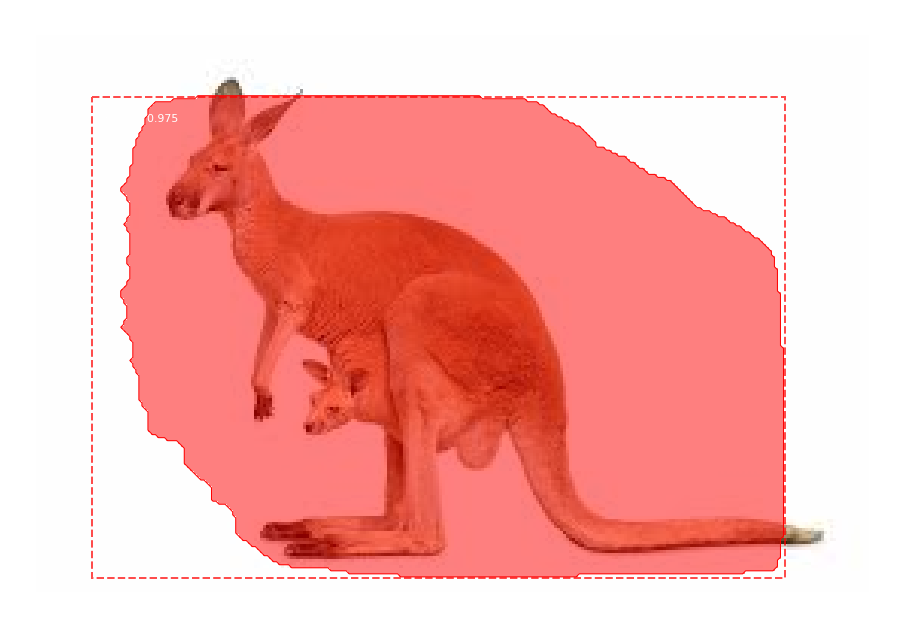

In [12]:
#Importintg all dependencies Libraries
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

CLASS_NAMES = ['BG', 'kangaroo']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())
# We are loading the trained weights 
model.load_weights(filepath="/content/drive/MyDrive/Colab Notebooks/Kangaro_mask_rcnn.h5", 
                   by_name=True)
# We are giving the test image path 
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CODEBUGGED AI/TESTING/3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

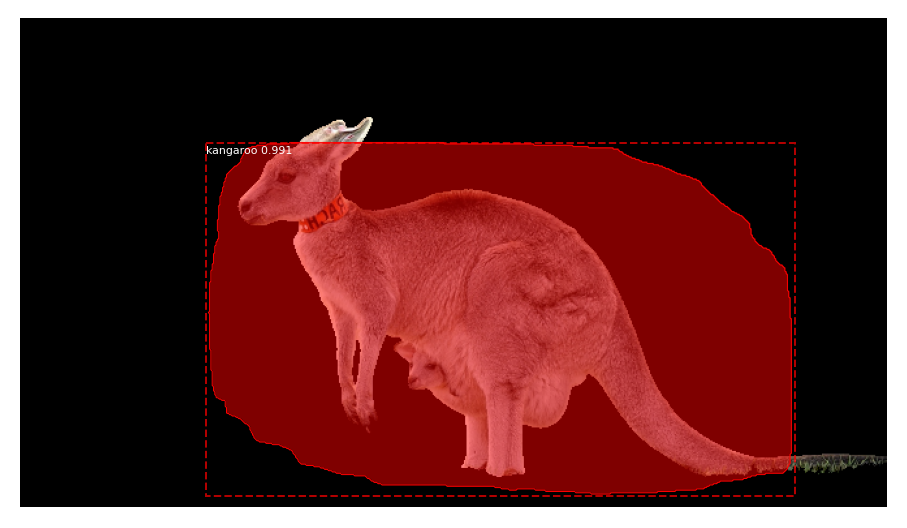

In [13]:
#Importintg all dependencies Libraries
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

CLASS_NAMES = ['BG', 'kangaroo']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())
# We are loading the trained weights 
model.load_weights(filepath="/content/drive/MyDrive/Colab Notebooks/Kangaro_mask_rcnn.h5", 
                   by_name=True)
# We are giving the test image path 
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CODEBUGGED AI/TESTING/4.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])